In [1]:
import pandas as pd
from rdkit import Chem
# import Descriptors
from rdkit.Chem import Descriptors
# import DataStructs
from rdkit.Chem import DataStructs
import numpy as np

In [ ]:
# df = pd.read_csv("../../results/schembl_summs_v4_gpt_cleaned_eps_0.340_diff_20030_final.csv")

# df["mol"] = df["smiles"].apply(lambda x: Chem.MolFromSmiles(x))

# df["mw"] = df["mol"].apply(lambda x: Descriptors.MolWt(x))
# # calculate fingerprints
# df["fp"] = df["mol"].apply(lambda x: Chem.RDKFingerprint(x))

# # calculate maximum pairwise similarity
# df["max_similarity"] = df["fp"].apply(
#     lambda x: np.partition(DataStructs.BulkTanimotoSimilarity(x, df["fp"].tolist()), -2)[-2]
# )

# df.to_csv('00-2_molecule_density_plots.csv', index=False)

In [2]:
df = pd.read_csv("00-2_molecule_density_plots.csv")

In [3]:
# max, min, mean, std of ["mw"] and ["max_similarity"]
print(df[["mw", "max_similarity"]].describe())

                 mw  max_similarity
count  99454.000000    99454.000000
mean     440.790562        0.678538
std      203.968511        0.152264
min      100.117000        0.076923
25%      311.256750        0.568542
50%      415.481500        0.672877
75%      520.978750        0.795310
max     5749.602000        1.000000


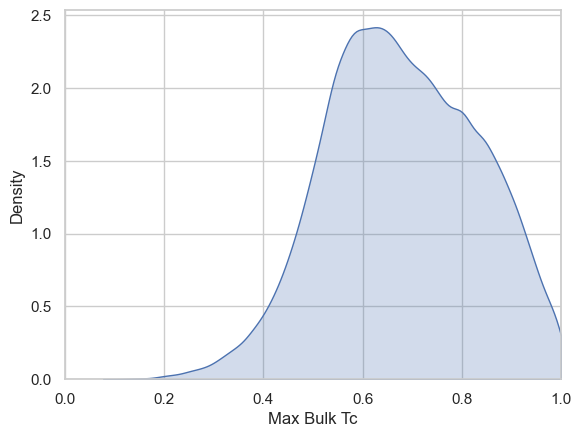

In [4]:
# create density plots for mw, max_similarity
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")

sns.kdeplot(df["mw"], fill=True, color="r", cut=0)
plt.xlim(0,)
plt.xlabel("Molecular Weight (Da)")
plt.ylabel("Density")


plt.savefig("mw_density.png", dpi=300, bbox_inches="tight")

sns.kdeplot(df["max_similarity"], fill=True, color="b", cut=0)
plt.xlabel("Max Bulk Tc")
plt.ylabel("Density")
plt.xlim(0, 1)
plt.savefig("max_similarity_density.png", dpi=300, bbox_inches="tight")